# Visualisation en 2 dimensions de données multi-dimensionnelles

Utilisez `matplotlib` et plus particulièrement la fonction `matplotlib.pyplot.draw` pour afficher sur le plan une liste de segments. 

Chaque segment est défini par, respectivement, la liste des abscisses et la liste des ordonnées de ses deux extrémités.

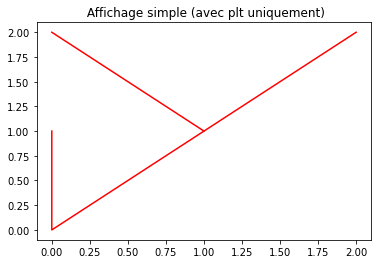

In [5]:
import matplotlib.pyplot as plt
import numpy as np

#  AVEC plt.plot seulement 
n=3
plt.title(" Affichage simple (avec plt uniquement)")
listeDesAscisses= np.random.randint(n, size = (n,2))#  [1,5,-1,3,-2]
listeDesOrdonnes=np.random.randint(n, size = (n,2)) #  [-1,2,3,4,5]
#
plt.plot(listeDesAscisses,listeDesOrdonnes,'r') 

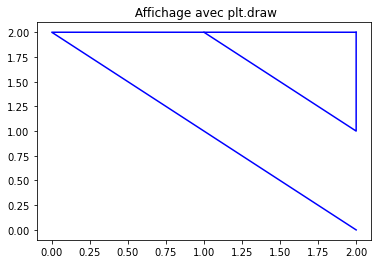

In [11]:
# AVEC plt.draw() : Utile dans le cas ou on fermait le fenetre : pour mettre à jour les figures modifiées qui nous permettent de travailler en mode interactif ( avec le widget et interact( par exemple).

def plot_with_draw(listeDesAscisses,listeDesOrdonnes):
    plt.title(" Affichage avec plt.draw")
    plt.plot(listeDesAscisses,listeDesOrdonnes,'b')
    plt.draw() #Force l’affichage (le “retraçage”) de la figure.
    
n=3    
listeDesAscisses= np.random.randint(n, size = (n,2))   #[1,5,-1,3,-2]
listeDesOrdonnes= np.random.randint(n, size = (n,2))  #[-1,2,3,4,5]
#

plot_with_draw(listeDesAscisses,listeDesOrdonnes)

Le dispositifs de visualisation les plus courants permettent une visualisation des données en deux dimensions. Lorsque les données sont initialement multi-dimensionnelles, il va s'agir de projeter ces données sur un sous-espace vectoriel de dimension deux.

## Rappels d'algèbre linéaire

Soient $F$ un espace vectoriel et $E$ un sous-espace vectoriel de $F$. Il est possible de décomposer un vecteur $x \in F$ comme la somme $x = x_E + x^\perp$ avec $x_E \in E$ et $x^\perp$ tel que $\forall y \in E, \langle x^\perp,y \rangle=0$.

$x_E$ est la projection orthogonale de $x$ dans le sous-espace vectoriel $E$.

Ecrire la fonction qui, recevant en paramètre une liste de vecteurs formant une base du sous-espace vectoriel $E$ et $x$ un vecteur de $F$, renvoie le vecteur $x_E$, le projeté de $x$ sur le sous-espace vectoriel $E$.

Remarque, le vecteur $x_E$ est composé de la somme des projections orthogonales de $x$ sur chacun des vecteurs de la base de $E$.

Vérifiez notamment, qu'en dimension 3 (axes $\vec{x}, $\vec{y} et $\vec{z}$), le projeté d'un vecteur sur le plan défini par la base $B_1 = \{(1,0,0), (0,1,0)\}$ a sa composante composante sur $\vec{z}$ nulle.

Faites les vérifications équivalentes sur les sous-espaces vectoriels définis par les bases suivantes :
- $B_2=\{(1,0,0), (0,0,1)\}$
- $B_3=\{(0,1,0), (0,0,1)\}$

## Résolution

1.Ecrire la fonction qui, recevant en paramètre une liste de vecteurs formant une base du sous-espace vectoriel  𝐸  et  𝑥  un vecteur de  𝐹 , renvoie le vecteur  𝑥𝐸 , le projeté de  𝑥  sur le sous-espace vectoriel  𝐸.

   ==> Les composantes de la projection orthogonale d'un vecteur 𝑥 peut se calculer par la formule :
            
           (( u*v)/(norme de v)**2)*v

           - Avec u et v deux vecteurs. 

In [224]:
def proj_sousEspace_Vecto(listVecteur,x):
    n=len(listVecteur[0])
    proj_x=np.zeros(n)
    x=np.array(x)
    for i in listVecteur:
        i=np.array(i)
        norm_i= np.sqrt(sum(i**2))
        proj_i= (np.dot(i,x) / norm_i**2)*i
        proj_x =proj_x + proj_i
    return proj_x
        
# Exécution de la fonction

listVecteur=[(2,0,0),(0,0,2),(0,2,0)]
x=(3,4,1)

print("Le projeté de  𝑥  sur le sous-espace vectoriel  𝐸  est : ")
proj_sousEspace_Vecto(listVecteur,x)


Le projeté de  𝑥  sur le sous-espace vectoriel  𝐸  est : 


array([3., 4., 1.])

### VISUALISATION  EN 2D
    

In [225]:
# Fonction qui convertit la liste de tuples en liste de listes(numpy array ??)

def conversion(listVecteur):
    li=[]
    li2=[]
    for u in listVecteur:
        u=np.array(u)
        li.append(u)
    for t in li:
        t=list(t)
        li2.append(t)
    return li2


listVecteur=[(2,1),(0,3),(0,2)]
a=conversion(listVecteur)
a[1][1]

3

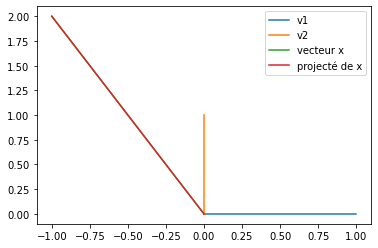

In [226]:
def projDraw(listVecteur,x):
    plt.figure()
    u=conversion(listVecteur)
    p=proj_sousEspace_Vecto(listVecteur,x)
    plt.plot([0,u[0][0]],[0,u[0][1]],label='v1') # premier vecteur sur la liste
    plt.plot([0,u[1][0]],[0,u[1][1]],label='v2') # deuxième vecteur sur la liste
   # plt.plot([0,u[2][0]],[0,u[2][1]],label='v3') # troisième vecteur sur la liste
    plt.plot([0,x[0]],[0,x[1]],label='vecteur x') #  vecteur x 
    plt.plot([0,p[0]],[0,p[1]],label='projecté de x')
    plt.legend()
    plt.draw()
  

#

listVecteur=[(1,0),(0,1)]
x=(-1,2)

projDraw(listVecteur,x)
    
    
   

#### Commentaire:
    Le vecteur x est confondu à son image.

2. Vérifiez notamment, qu'en dimension 3 (axes  𝑥⃗ , \vec{y}  et  𝑧⃗  ), le projeté d'un vecteur sur le plan défini par la base  𝐵1={(1,0,0),(0,1,0)}  a sa composante sur  𝑧⃗   nulle.

In [227]:
# Exécution de la fonction avec B1

listVecteur=[(1,0,0),(0,1,0)]
x=(2,1,3)

proj_sousEspace_Vecto(listVecteur,x)
    

array([2., 1., 0.])

### Commentaire:
    La composante de 𝑥 sur 𝑧⃗ est nulle.

3. Faites les vérifications équivalentes sur les sous-espaces vectoriels définis par les bases suivantes :

𝐵2={(1,0,0),(0,0,1)} 
𝐵3={(0,1,0),(0,0,1)}

In [228]:
# Exécution de la fonction avec B2

listVecteur=[(1,0,0),(0,0,1)]
x=(2,1,3)

proj_sousEspace_Vecto(listVecteur,x)

array([2., 0., 3.])

### Commentaire:
La composante de 𝑥 sur y est nulle.

In [229]:
# Exécution de la fonction avec B3

listVecteur=[(0,1,0),(0,0,1)]
x=(2,1,3)

proj_sousEspace_Vecto(listVecteur,x)

array([0., 1., 3.])

### Commentaire:
La composante de 𝑥 sur 𝑥⃗ est nulle.

## Transformations géométriques et opérations matricielles en 3 dimensions

Dans cette partie nous allons étudier des transformations algébriques dans $\mathbb{R}^3$.

Définissez l'opération matricielle réalisant la translation d'un point $M = (x,y,z)$ par un vecteur $v_T = (x_T, y_T, z_T)$ et implantez cette opération par une fonction en langage python.

## Résolution:

L'opération matricielle réalisant la translation d'un point  𝑀=(𝑥,𝑦,𝑧)  par un vecteur  𝑣𝑇=(𝑥𝑇,𝑦𝑇,𝑧𝑇) est défini par la somme de coordonnées de ce point et les composantes de la matrices:  
                            -    x+𝑥𝑇=x′
                            -    y+𝑦𝑇=y′
                            -    z+𝑧𝑇=z′
                            Avec x′,y′ et z′ les coordonnées du translaté du point M.

In [279]:
def translation(M,v):
    M=np.array(M)
    v=np.array(v)
    mat= M+v
    return mat
    
# Exécution de la fonction 

M=(1,2,3)
v=(0,1,0)


#
print("Le translaté du point M par le vecteur v est :")
translation(M,v)


Le translaté du point M par le vecteur v est :


array([1, 3, 3])

Définissez l'opération matricielle réalisant une homothétie de centre $(0,0,0)$ et de rapport $\alpha$ et implantez la via une fonction python.

## Résolution:

L'opération matricielle réalisant une homothétie de centre (0,0,0)  et de rapport  𝛼  est définie par: 
              - (𝛼  0  0 )*x=x′
              - (0  𝛼  0 )*y =y′
              - (0  0  𝛼 )*z= z′
               Avec x′,y′ et z′ les coordonnées de l'image.

In [296]:
def homothetie0(M,centre,rapport):
    M=np.array(M)
    centre=np.array(centre)
    I = np.identity(len(centre))
    P=rapport * I
    S= np.dot(P,M)
    return S


M=(1,2,3)    
centre=(0,0,0)
rapport= 2
#
print("L'homothétie du point M de centre (0,0,0) et de rapport 𝛼 est donnée par :")
homothetie0(M,centre,rapport)

L'homothétie du point M de centre (0,0,0) et de rapport 𝛼 est donnée par :


array([2., 4., 6.])

Une homothétie de rapport $\alpha$ et de centre $C=(x_c,y_c,z_c)$ peut être décomposée de la façon suivante.

Soit $v_c = ((x_c,y_c,z_c)$. On réalise dans un premier temps une translation de $-v_c$, puis une homothétie de rapport $\alpha$ et de centre $(0,0,0)$ et enfin un translation de $v_c$.

Exprimez de façon matricelle cette transformation géométrique et implantez-la via une fonction python, faisant éventuellement appel aux fonctions définies précédemment.

In [298]:
def homothetie(M,centre,rapport):
    M=np.array(M)
    centre=np.array(centre)
    return homothetie0(M - centre,centre, rapport)
#
M=(1,2,3)    
centre=(1,0,2)
rapport= 2

print("L'homothétie du point de centre {} et de rapport 𝛼 est donnée par :".format(M))
homothetie(M,centre,rapport)

L'homothétie du point de centre (1, 2, 3) et de rapport 𝛼 est donnée par :


array([0., 4., 2.])

On définit la matrice de rotation $R_{\theta,v_R}$ d'un angle $\theta$ autour du vecteur unitaire $v_R = (x_R, y_R, z_R)$ de la façon suivante. 

$$R_{\theta,v_R} = \left(\begin{array}{ccc}x_R^2.(1-\cos \theta) + \cos \theta & x_R y_R (1 - \cos \theta) - z_R \sin \theta & x_R z_R (1 - \cos \theta) + y_R \sin \theta \\ x_R y_R (1 - \cos \theta) + z_R \sin \theta & y_R^2.(1-\cos \theta) + \cos \theta & y_R z_R (1 - \cos \theta) - x_R \sin \theta \\ x_R z_R (1 - \cos \theta) - y_R \sin \theta & y_R z_R (1 - \cos \theta) + x_R \sin \theta & z_R^2.(1-\cos \theta) + \cos \theta \end{array}\right) $$

La transformation d'un point de $\mathbb{R}^3$ par une rotation de $\theta$ autour de $v_R$ revient à multiplier à gauche le vecteur représentant le point par $R_{\theta,v_R}$.

Attention, $v_R$ doit être unitaire. Si ce n'est pas le cas, il doit être multiplié par $\frac{1}{||v_R||}$. Par ailleurs, dans un système orienté normalement, les rotation s'opère dans le sens inverse des aiguilles d'une montre lorsque $v_R$ pointe vers l'observateur.

Implantez cette transformation sous la forme d'une fonction python.

In [236]:
#Fonction qui renvoie la norme du vecteur

def calcul_norme(v):
    v=np.array(v)
    n=v.shape[0]
    s=0
    for i in range(n):
        s= s + v[i]**2
    norme= np.sqrt(s)
    return norme
    
    
v=(2,1,2)
calcul_norme(v)    

3.0

In [237]:
# Fonction qui vérifie si la matrive c est unitaire. 
# Sinon, multiplie le vecteur par l'inverse de sa norme.

def verif_Mat_Unitaire(v):
    v=np.array(v)
    norme_v=calcul_norme(v)
    if(norme_v != 1):
        v=v*(1/norme_v)
    return v


v=(0,1,0)
verif_Mat_Unitaire(v)

array([0, 1, 0])

In [307]:
def Matrice_Rotation(v,theta):
    verif_Mat_Unitaire(v)
    return np.array([
         [ (v[0]**2)*(1-np.cos(theta)) + np.cos(theta),
           (v[0]*v[1])*(1-np.cos(theta)) - v[2]*np.sin(theta),
           (v[0]*v[2])*(1-np.cos(theta)) + v[1]*np.sin(theta)       
          ],
        
         [ (v[0]*v[1])*(1-np.cos(theta)) + v[2]*np.sin(theta),
           (v[1]**2)*(1-np.cos(theta)) + np.cos(theta),
           (v[1]*v[2])*(1-np.cos(theta)) - v[0]*np.sin(theta)
         ],
        
          [ (v[0]*v[2])*(1-np.cos(theta)) - v[1]*np.sin(theta),
            (v[1]*v[2])*(1-np.cos(theta)) + v[0]*np.sin(theta),
            (v[2]**2)*(1-np.cos(theta)) + np.cos(theta)      
        ]
                    ])


#

v=(2,1,1)
theta=90
M=(1,2,3)
Matrice_Rotation(v,theta) 

array([[ 5.34422085,  2.00215057,  3.7901439 ],
       [ 3.7901439 ,  1.        , -0.33991971],
       [ 2.00215057,  3.23606694,  1.        ]])

In [317]:
# Fonction renvoyant l'image de M par une rotation 

def rotation(M,v,theta):
    M=np.array(M)
    R=Matrice_Rotation(v,theta)
    rot=np.dot(R,M)
    return rot
#
v=(2,1,1)
theta=np.pi/2
M=(1,2,3)
#
rotation(M,v,theta)

array([15.,  2., 10.])

Visualisez sur le plan $(\vec{x},\vec{y})$ en utilisant les fonctions précédentes :
- le cube de défini par les coins $\{(0,0,0), (1,0,0), (1,1,0), (0,1,0), (0,0,1), (1,0,1), (1,1,1), (0,1,1)\}$
- une translation du cube précédent de $(3,-2,4)$
- une homothétie du cube de rapport 3 et de centre (0,0,0)
- une homothétie du cube de rapport -2 et de centre (2,1,3)
- une rotation du cube de $\frac{\pi}{3}$ autour de l'axe défini par le vecteur $(5, 2, 3)$
- une combinaison de translation du cube précédent de $(3,-2,4)$, suivie d'une rotation du cube de $\frac{\pi}{3}$ autour de l'axe défini par le vecteur $(5, 2, 3)$ et enfin d'une une homothétie du cube de rapport -2 et de centre (2,1,3).

#### Visualisez  sur le plan  (𝑥⃗ ,𝑦⃗ ):
1. le cube défini par les coins  {(0,0,0),(1,0,0),(1,1,0),(0,1,0),(0,0,1),(1,0,1),(1,1,1),(0,1,1)} 

In [318]:
c0=np.array([0,0,0])
c1=np.array([1,0,0])
c2=np.array([1,1,0])
c3=np.array([0,1,0])
c4=np.array([0,0,1])
c5=np.array([1,0,1])
c6=np.array([1,1,1])
c7=np.array([0,1,1])
#
#c = [(c0,c1),(c1,c2),(c2,c3),(c0,c3),(c4,c5),(c5,c6),(c6,c7),(c6,c1),(c2,c5),(c7,c0),(c4,c3),(c0,c7)]

c = [(c0,c1),(c1,c2),(c2,c3),(c3,c0),(c4,c5),(c5,c6),(c6,c7),(c6,c1),(c5,c2),(c7,c0),(c4,c3),(c7,c4)]

In [319]:
def plot_segment(s,c):
    plt.plot([s[0][0],s[1][0]], [s[0][1], s[1][1]],c=c)

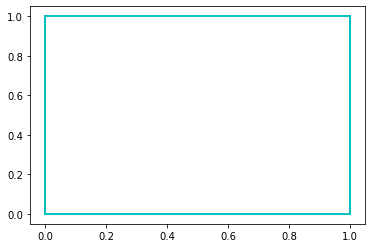

In [320]:
plt.figure()
for s in c:
    plot_segment(s,'c')
    

2. Une translation du cube précédent de  (3,−2,4)

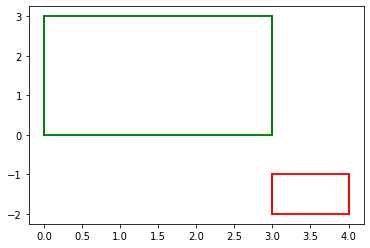

In [321]:
ct=[translation(s,np.array([3,-2,4])) for s in c]
for s in ct:
    plot_segment(s,'r')
ct=[(homothetie0(s,(0,0,0),3),homothetie(t,(0,0,0),3)) for s,t in c]
for s in ct :
    plot_segment(s,'g')

3. Une homothétie du cube de rapport 3 et de centre (0,0,0)

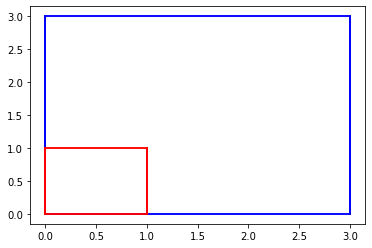

In [322]:
centre=(0,0,0)

ct = [ (homothetie(s,centre,3),homothetie(t,centre,3)) for s,t in c]
for s in ct:
    plot_segment(s,'b')
for s in c:
    plot_segment(s,'r')

4. Une homothétie du cube de rapport -2 et de centre (2,1,3)

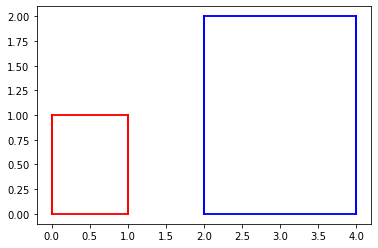

In [323]:
centre=(2,1,3)

ct = [ (homothetie(s,centre,-2),homothetie(t,centre,-2)) for s,t in c]
for s in ct:
    plot_segment(s,'b')
for s in c:
    plot_segment(s,'r')

5. Une rotation du cube de  𝜋3  autour de l'axe défini par le vecteur  (5,2,3) 


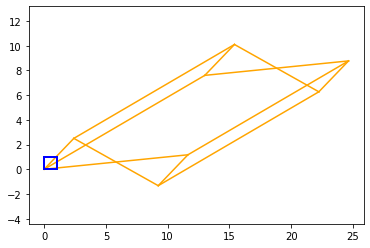

In [336]:
plt.axis('equal')
v=(5,2,3)
theta=np.pi/3
ct=[(rotation(s,v,theta),rotation(t,v,theta)) for s,t in c]

for s in ct:
    plot_segment(s,'orange')
    for s in c:
        plot_segment(s,'b')

### NOTA:
    Le cube n'a pas été bien déssiné ( les sommets n'ont pas été correctement relié).

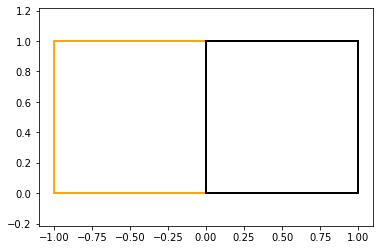

In [334]:
plt.axis('equal')
v=(0,0,1)
v=v * 1/np.sqrt(sum([c**2 for c in v]))
theta=np.pi/2
ct=[(rotation(s,v,theta),rotation(t,v,theta)) for s,t in c]

for s in ct:
    plot_segment(s,'orange')
    for s in c:
        plot_segment(s,'black')

6. Une combinaison de translation du cube précédent de  (3,−2,4) , suivie d'une rotation du cube de  𝜋3  autour de l'axe défini par le vecteur  (5,2,3)  et enfin d'une une homothétie du cube de rapport -2 et de centre (2,1,3).

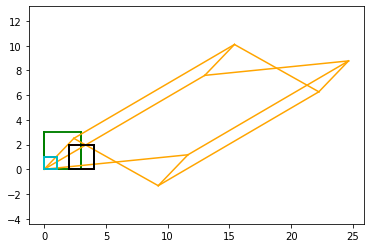

In [344]:
plt.axis('equal')
v=(5,2,3)
theta=np.pi/3
centre=(2,1,3)

#
#plt.figure(0)
t=[translation(s,np.array([3,-2,4])) for s in c]
for s in ct:
    plot_segment(s,'r')
ct=[(homothetie0(s,(0,0,0),3),homothetie(t,(0,0,0),3)) for s,t in c]
for s in ct :
    plot_segment(s,'g')
    
#

#plt.figure(1)
ct=[(rotation(s,v,theta),rotation(t,v,theta)) for s,t in c]

for s in ct:
    plot_segment(s,'orange')
    for s in c:
        plot_segment(s,'b')
        
#
#plt.figure(3)
ct = [ (homothetie(s,centre,-2),homothetie(t,centre,-2)) for s,t in c]
for s in ct:
    plot_segment(s,'black')
for s in c:
    plot_segment(s,'c')
